In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Генерація даних для класифікації
print("### Класифікація ###")
X_class, y_class = make_classification(n_samples=1000, n_features=10, 
                                       n_informative=5, n_classes=2, 
                                       random_state=42)

# Розподіл на тренувальний та тестовий набори
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Навчання моделі класифікації
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_class_train, y_class_train)

# Прогнозування та оцінка
y_class_pred = classifier.predict(X_class_test)
print("Classification Report:\n", classification_report(y_class_test, y_class_pred))


### Класифікація ###
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       158
           1       0.94      0.93      0.94       142

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [6]:

# 2. Генерація даних для регресії
print("\n### Регресія ###")
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, 
                               n_informative=5, noise=0.1, random_state=42)

# Розподіл на тренувальний та тестовий набори
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Навчання моделі регресії
regressor = RandomForestRegressor(random_state=42, n_estimators=100)
regressor.fit(X_reg_train, y_reg_train)

# Прогнозування та оцінка
y_reg_pred = regressor.predict(X_reg_test)
print("Mean Squared Error:", mean_squared_error(y_reg_test, y_reg_pred))
print("R2 Score:", r2_score(y_reg_test, y_reg_pred))



### Регресія ###
Mean Squared Error: 213.74294837041273
R2 Score: 0.9477241776156207


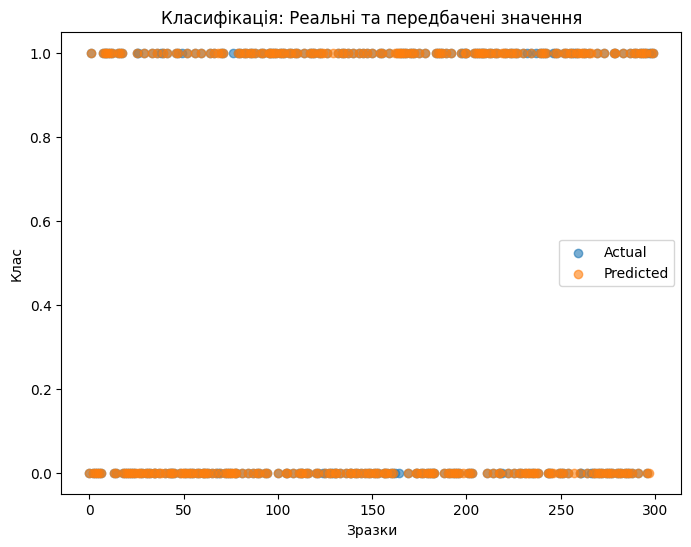

In [7]:

# 3. Візуалізація для класифікації
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_class_test)), y_class_test, label='Actual', alpha=0.6)
plt.scatter(range(len(y_class_pred)), y_class_pred, label='Predicted', alpha=0.6)
plt.title("Класифікація: Реальні та передбачені значення")
plt.xlabel("Зразки")
plt.ylabel("Клас")
plt.legend()
plt.show()


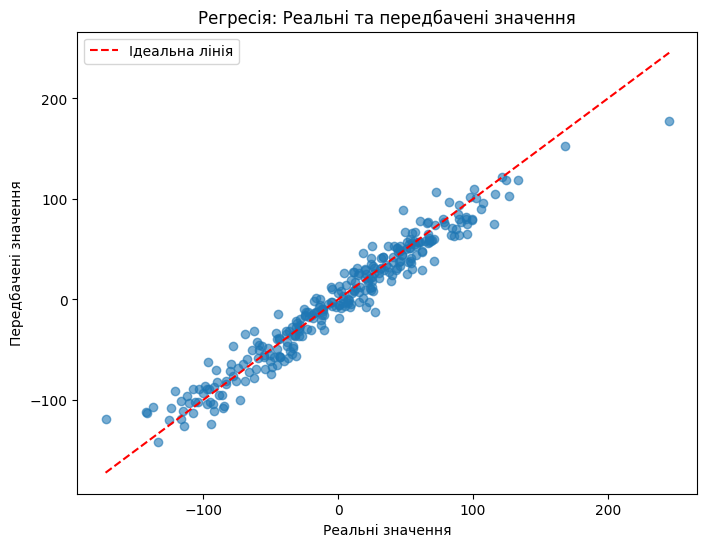

In [8]:

# 4. Візуалізація для регресії
plt.figure(figsize=(8, 6))
plt.scatter(y_reg_test, y_reg_pred, alpha=0.6)
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--', label="Ідеальна лінія")
plt.title("Регресія: Реальні та передбачені значення")
plt.xlabel("Реальні значення")
plt.ylabel("Передбачені значення")
plt.legend()
plt.show()


### Класифікація з 5 класами ###
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83        56
           1       0.82      0.83      0.82        59
           2       0.87      0.87      0.87        60
           3       0.78      0.75      0.76        63
           4       0.76      0.84      0.80        62

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



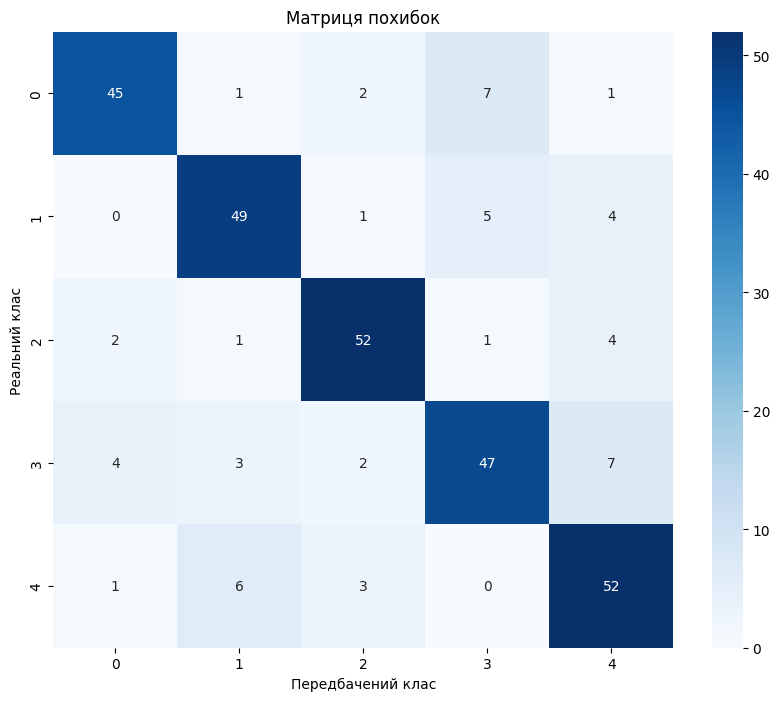

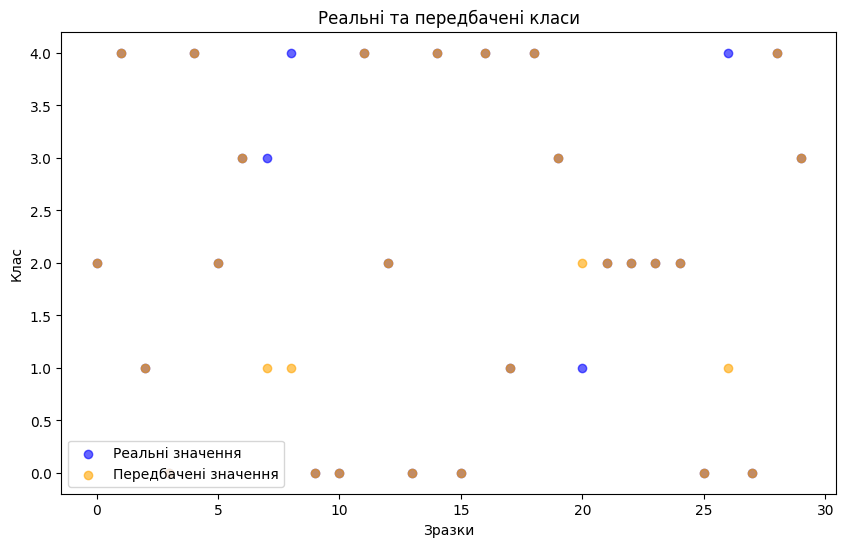

In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Генерація даних для класифікації з 5 класами
print("### Класифікація з 5 класами ###")
X_class, y_class = make_classification(n_samples=1000, n_features=10, 
                                       n_informative=5, n_classes=5, 
                                       n_clusters_per_class=1, random_state=42)

# Розподіл на тренувальний та тестовий набори
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

# Навчання моделі класифікації
classifier = RandomForestClassifier(random_state=42, n_estimators=100)
classifier.fit(X_class_train, y_class_train)

# Прогнозування та оцінка
y_class_pred = classifier.predict(X_class_test)
print("Classification Report:\n", classification_report(y_class_test, y_class_pred))

# 2. Матриця похибок
conf_matrix = confusion_matrix(y_class_test, y_class_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.xlabel('Передбачений клас')
plt.ylabel('Реальний клас')
plt.title('Матриця похибок')
plt.show()

# 3. Візуалізація реальних і передбачених класів
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_class_test[:30])), y_class_test[:30], label='Реальні значення', alpha=0.6, color='blue')
plt.scatter(range(len(y_class_pred[:30])), y_class_pred[:30], label='Передбачені значення', alpha=0.6, color='orange')
plt.title("Реальні та передбачені класи")
plt.xlabel("Зразки")
plt.ylabel("Клас")
plt.legend()
plt.show()


In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Генерація даних для регресії
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, 
                               n_informative=5, noise=0.1, random_state=42)

# Розподіл на тренувальний та тестовий набори
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

# Словник для збереження результатів
models = {
    "Лінійна регресія": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "SVM (RBF)": SVR(kernel='rbf'),
    "SGD Regressor": SGDRegressor(max_iter=1000, tol=1e-3, random_state=42),
    "Lasso": Lasso(alpha=0.1, random_state=42),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
}

results = {}

# 2. Навчання та оцінка моделей
for name, model in models.items():
    # Навчання
    model.fit(X_reg_train, y_reg_train)
    
    # Прогнозування
    y_pred = model.predict(X_reg_test)
    
    # Обчислення метрик
    mse = mean_squared_error(y_reg_test, y_pred)
    r2 = r2_score(y_reg_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

    # Виведення результатів
    print(f"{name}:\n  Mean Squared Error: {mse:.4f}\n  R2 Score: {r2:.4f}\n")

# 3. Порівняння результатів
results_df = pd.DataFrame(results).T
print("Підсумкове порівняння моделей:\n", results_df)


Лінійна регресія:
  Mean Squared Error: 0.0084
  R2 Score: 1.0000

Random Forest:
  Mean Squared Error: 213.7429
  R2 Score: 0.9477

SVM (RBF):
  Mean Squared Error: 2392.0411
  R2 Score: 0.4150

SGD Regressor:
  Mean Squared Error: 0.0084
  R2 Score: 1.0000

Lasso:
  Mean Squared Error: 0.0557
  R2 Score: 1.0000

Elastic Net:
  Mean Squared Error: 8.5934
  R2 Score: 0.9979

Підсумкове порівняння моделей:
                           MSE        R2
Лінійна регресія     0.008379  0.999998
Random Forest      213.742948  0.947724
SVM (RBF)         2392.041052  0.414971
SGD Regressor        0.008436  0.999998
Lasso                0.055722  0.999986
Elastic Net          8.593356  0.997898


In [21]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Лінійна регресія to Elastic Net
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSE     6 non-null      float64
 1   R2      6 non-null      float64
dtypes: float64(2)
memory usage: 144.0+ bytes


In [22]:
results_df['MSE'] = results_df['MSE']/1000

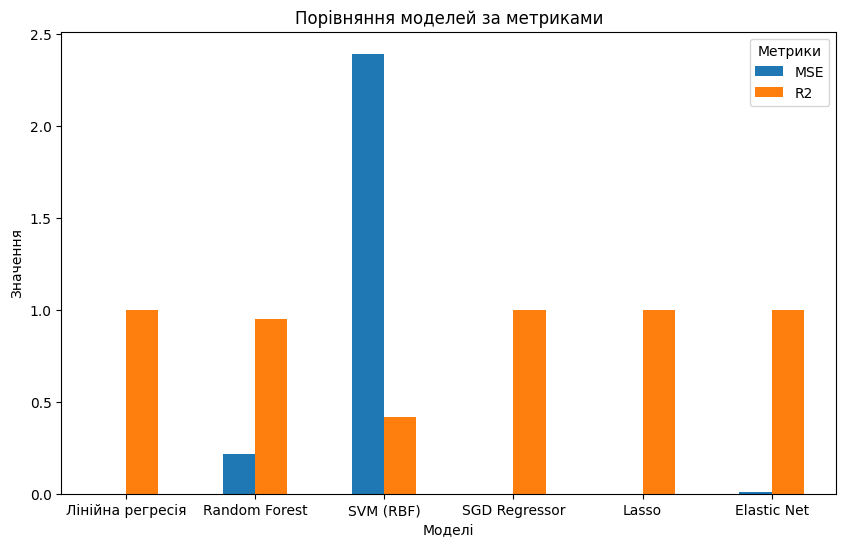

In [23]:

# 4. Візуалізація порівняння
results_df.plot(kind='bar', figsize=(10, 6))
plt.title("Порівняння моделей за метриками")
plt.ylabel("Значення")
plt.xlabel("Моделі")
plt.legend(title="Метрики")
plt.xticks(rotation=0)
plt.show()
